In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv
/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [4]:
df.drop(columns = ["Unnamed: 0"],inplace =True)

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [6]:
import matplotlib.pyplot as plt

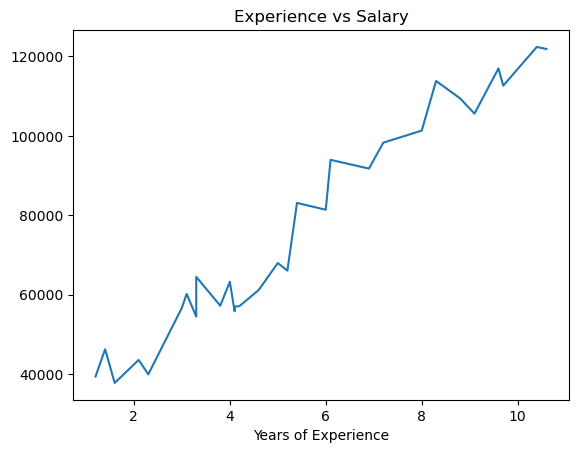

In [7]:
plt.plot(df["YearsExperience"],df["Salary"])
plt.xlabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Experience vs Salary");

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
features = ["YearsExperience"]
X_train = df[features]
target = "Salary"
y_train =df[target]


In [10]:
y_mean = y_train.mean()
y_mean

76004.0

In [11]:
y_pred_baseline = [y_mean] * len(y_train)
len(y_pred_baseline)

30

In [12]:
print(f"Mean Absolute Error :  {mean_absolute_error(y_train,y_pred_baseline)}")

Mean Absolute Error :  24290.466666666667


In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print(f"Mean absolute error of training is {mean_absolute_error (y_train,y_pred_training)}")

Mean absolute error of training is 4644.201289443537


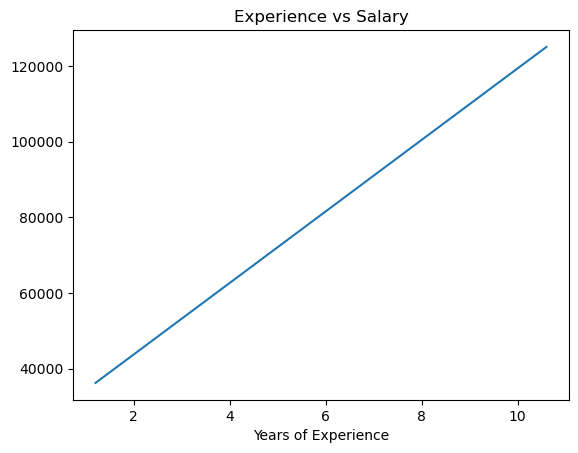

In [15]:
plt.plot(X_train,y_pred_training)
plt.xlabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Experience vs Salary");

OR YOU CAN TRY THIS

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
x_train = df['YearsExperience']
y_train = df['Salary']

In [20]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [22]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [23]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [24]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.30e+09  dj_dw: -4.850e+05, dj_db: -7.600e+04   w:  4.850e+03, b: 7.60040e+02
Iteration 1000: Cost 1.65e+07  dj_dw:  8.854e+01, dj_db: -6.033e+02   w:  9.880e+03, b: 2.19186e+04
Iteration 2000: Cost 1.57e+07  dj_dw:  1.132e+01, dj_db: -7.711e+01   w:  9.505e+03, b: 2.44737e+04
Iteration 3000: Cost 1.56e+07  dj_dw:  1.447e+00, dj_db: -9.856e+00   w:  9.457e+03, b: 2.48003e+04
Iteration 4000: Cost 1.56e+07  dj_dw:  1.849e-01, dj_db: -1.260e+00   w:  9.451e+03, b: 2.48421e+04
Iteration 5000: Cost 1.56e+07  dj_dw:  2.363e-02, dj_db: -1.610e-01   w:  9.450e+03, b: 2.48474e+04
Iteration 6000: Cost 1.56e+07  dj_dw:  3.021e-03, dj_db: -2.058e-02   w:  9.450e+03, b: 2.48481e+04
Iteration 7000: Cost 1.56e+07  dj_dw:  3.862e-04, dj_db: -2.631e-03   w:  9.450e+03, b: 2.48482e+04
Iteration 8000: Cost 1.56e+07  dj_dw:  4.936e-05, dj_db: -3.363e-04   w:  9.450e+03, b: 2.48482e+04
Iteration 9000: Cost 1.56e+07  dj_dw:  6.309e-06, dj_db: -4.299e-05   w:  9.450e+03, b: 2.48482e+04


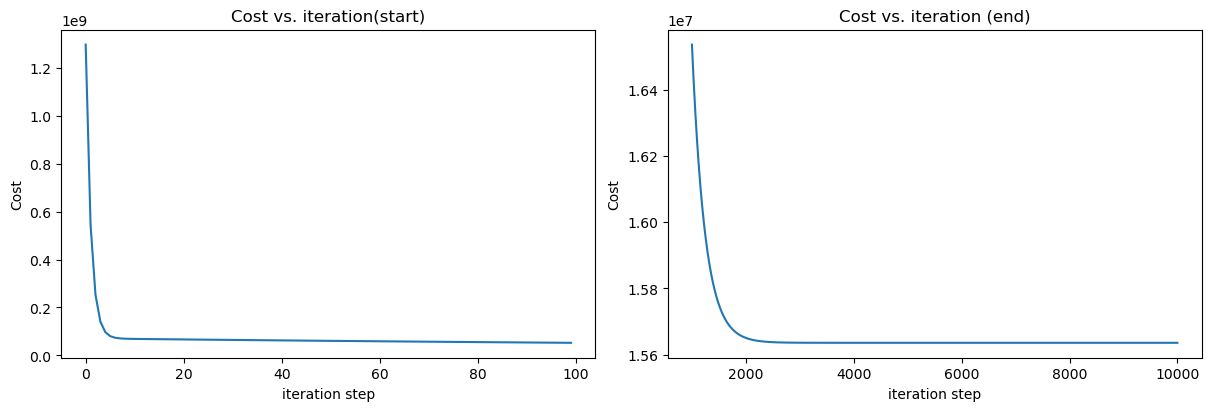

In [25]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [26]:
print(f"Salary {w_final*1.0 + b_final:0.1f} dollars")
print(f"Salary {w_final*1.2 + b_final:0.1f} dollars")
print(f"Salary {w_final*2.0 + b_final:0.1f} dollars")

Salary 34298.2 dollars
Salary 36188.2 dollars
Salary 43748.1 dollars


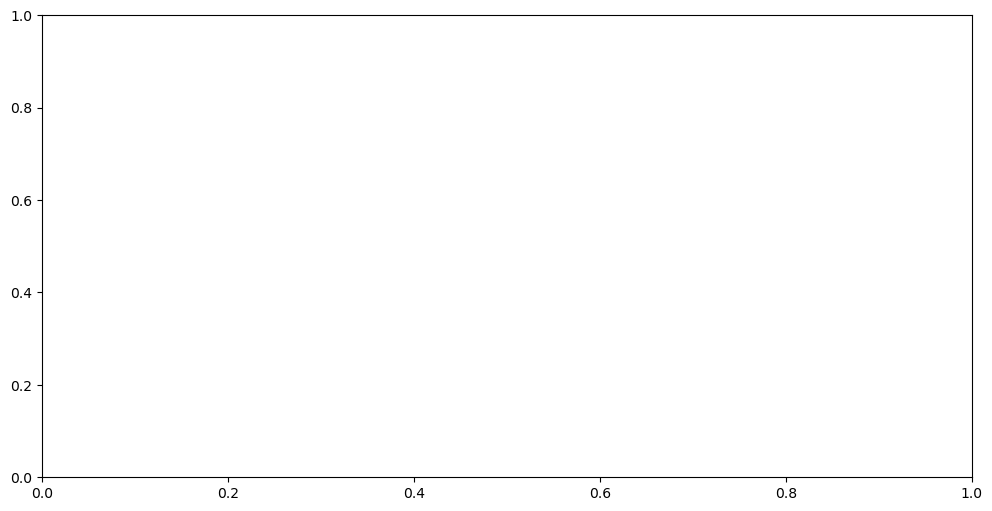

In [33]:
X_train = df['YearsExperience']
y_train = df['Salary']